<a href="https://colab.research.google.com/github/appletiger0704/Titanic/blob/main/Titanic_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
from google.colab import data_table

# grapg
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [123]:
url = "https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv"
raw = pd.read_csv(url)
data_table.DataTable(raw, include_index=True, num_rows_per_page=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


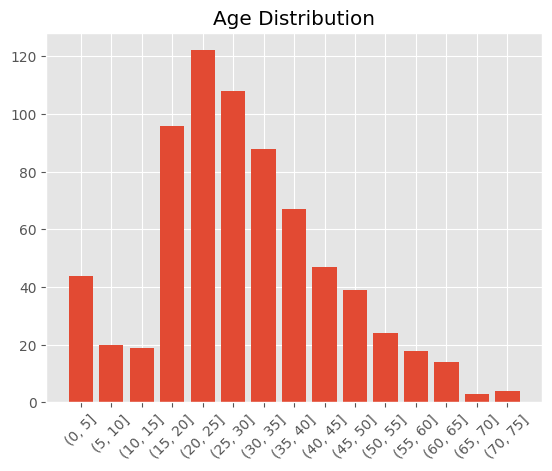

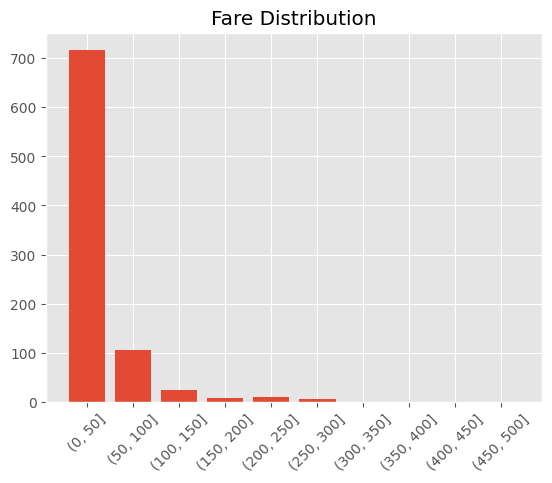

<Axes: xlabel='Pclass'>

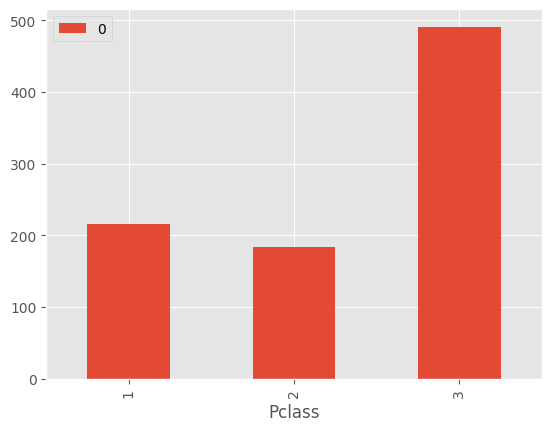

In [124]:
def distribution_count(col, col_bin):
  bins = range(0, int(max(col)), col_bin)
  df = pd.cut(col, bins=bins)
  distribution = df.value_counts()
  distribution = distribution.sort_index()
  return distribution

plt.style.use('ggplot')

# Age Distribution
with plt.style.context('ggplot'):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.bar(x=distribution_count(raw["Age"], 5).index.astype(str), height=distribution_count(raw["Age"], 5))
  plt.title("Age Distribution")
  plt.xticks(rotation=45)
  plt.show()

# Fare Distribution

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.bar(x=distribution_count(raw["Fare"], 50).index.astype(str), height=distribution_count(raw["Fare"], 50))
plt.title("Fare Distribution")
plt.xticks(rotation=45)
plt.show()


raw.groupby(["Pclass"]).size().to_frame().plot(kind='bar')

<ipython-input-125-3a4acd48654a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = raw.corr()


<Axes: >

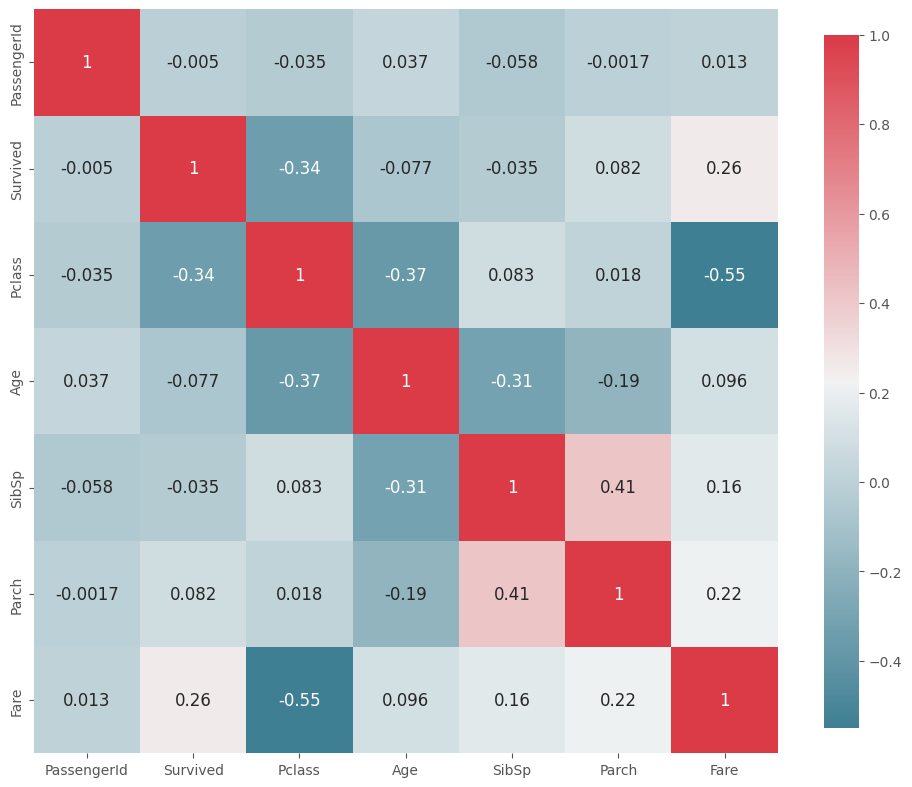

In [125]:
# 查看相關係數
corr = raw.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
      corr,
      cmap = cmap,
      square=True,
      cbar_kws={ 'shrink' : .9 },
      ax = plt.subplots( figsize =( 12 , 10 ) )[1],
      annot = True,
      annot_kws = { 'fontsize' : 12 }
)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

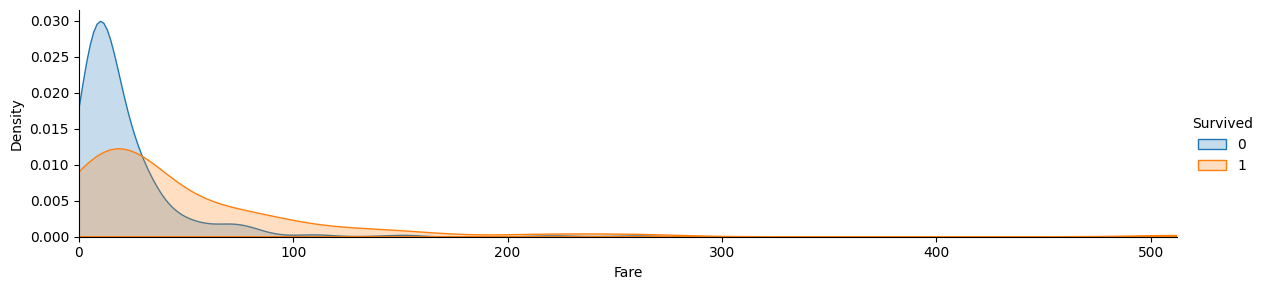

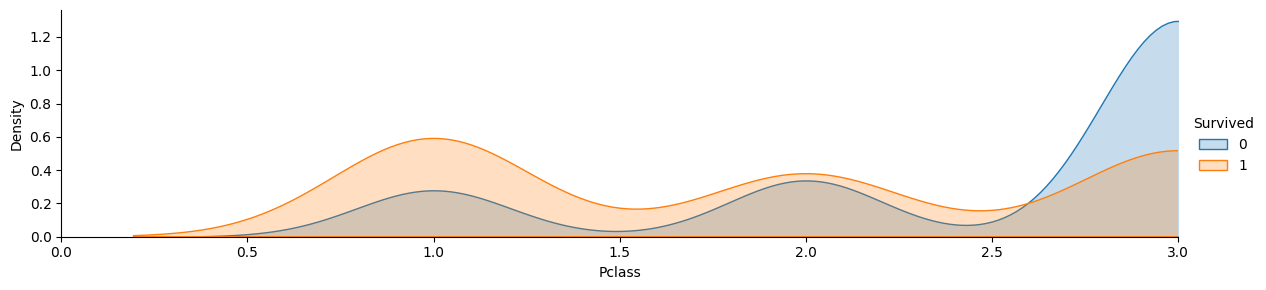

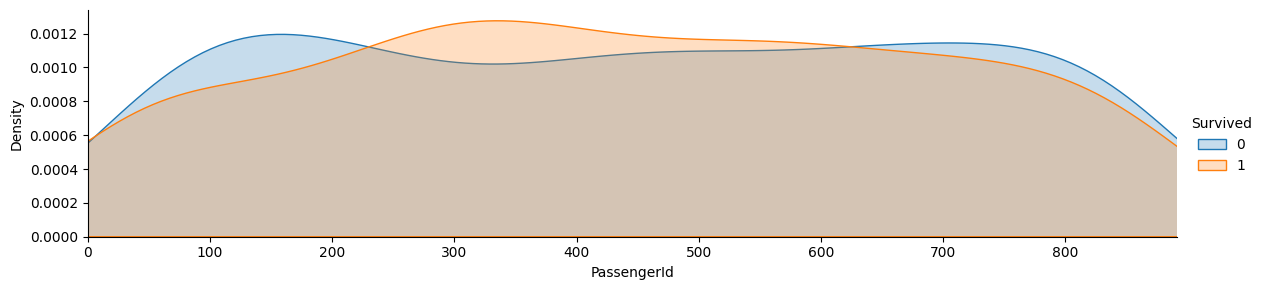

In [126]:
def plot_distribution(df, var, target, **kwargs):
  # 設定網格樣式
  row = kwargs.get('row' ,None)
  col = kwargs.get('col' ,None)
  facet = sns.FacetGrid(df, hue=target, aspect=4 ,row = row ,col = col)
  facet.map(sns.kdeplot ,var ,shade= True)
  facet.set(xlim=(0 ,df[ var ].max() ) )
  facet.add_legend()

with plt.style.context("default"):
  plot_distribution(raw ,var = 'Fare' ,target = 'Survived')
  plot_distribution(raw ,var = 'Pclass' ,target = 'Survived')
  plot_distribution(raw ,var = 'PassengerId' ,target = 'Survived')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


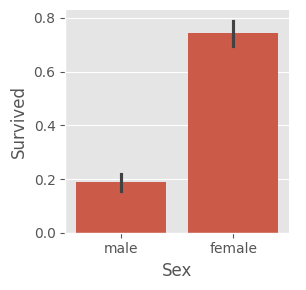

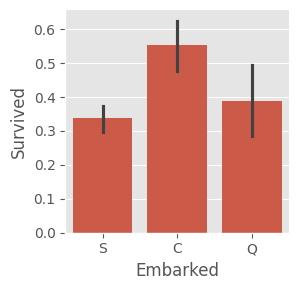

In [127]:
# 查看 categorical data
# sns.facetgrid()
def categorical_plot(df, var, target, **kwargs):
  row = kwargs.get('row' ,None)
  col = kwargs.get('col' ,None)
  facet = sns.FacetGrid(df, row=row, col=col)
  # 自動計算各個分類(var)的survived平均值
  facet.map(sns.barplot, var, target)
  facet.add_legend()

categorical_plot(raw, var="Sex", target="Survived")
categorical_plot(raw, var="Embarked", target="Survived")

In [128]:
# 資料前處裡
data_train = raw.copy()

# missing_value
# Cabin 缺失值過多故不考慮
data_train.drop(["Cabin"], axis=1, inplace=True)
data_train["Age"] = data_train["Age"].fillna(data_train["Age"].mean())
data_train["Embarked"] = data_train["Embarked"].fillna(data_train["Embarked"].mode()[0])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [129]:
# 特徵工程 Sex
df_sex = pd.get_dummies(data_train["Sex"])
data_train = data_train.join(df_sex)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1


In [130]:
# 特徵工程
df_embarked = pd.get_dummies(data_train["Embarked"])
data_train = data_train.join(df_embarked)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1,1,0,0


In [131]:
# familysize
data_train["FamilySize"] = data_train["SibSp"] + data_train["Parch"]
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,0,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,0,0,0,1,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1,1,0,0,0


In [132]:
# Name 處理
data_train["TitleRow"] = data_train["Name"].map(lambda name:name.split(",")[1].split(".")[0].strip())

title_encoding = {
  "Capt":"Officer",
  "Col":"Officer",
  "Major":"Officer",
  "Jonkheer":"Royalty",
  "Don":"Royalty",
  "Sir":"Royalty",
  "Dr":"Officer",
  "Rev":"Officer",
  "the Countess":"Royalty",
  "Dona":"Royalty",
  "Mme":"Mrs",
  "Mlle":"Miss",
  "Ms":"Mrs",
  "Mr":"Mr",
  "Mrs":"Mrs",
  "Miss":"Miss",
  "Master":"Master",
  "Lady":"Royalty"
}

data_train["TitleRow"] = data_train["TitleRow"].map(title_encoding)
df_name = pd.get_dummies(data_train["TitleRow"])
data_train = data_train.join(df_name)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,FamilySize,TitleRow,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,0,1,1,Mr,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,0,0,1,Mrs,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,0,1,0,Miss,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,0,1,1,Mrs,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,0,1,0,Mr,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,0,1,0,Officer,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,0,1,0,Miss,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,...,0,1,3,Miss,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,0,0,0,Mr,0,0,1,0,0,0


,Survived
Survived,1.000000
Age,-0.069809
Fare,0.257307
FamilySize,0.016639
female,0.543351
male,-0.543351
C,0.168240
Q,0.003650
S,-0.149683
Master,0.085221


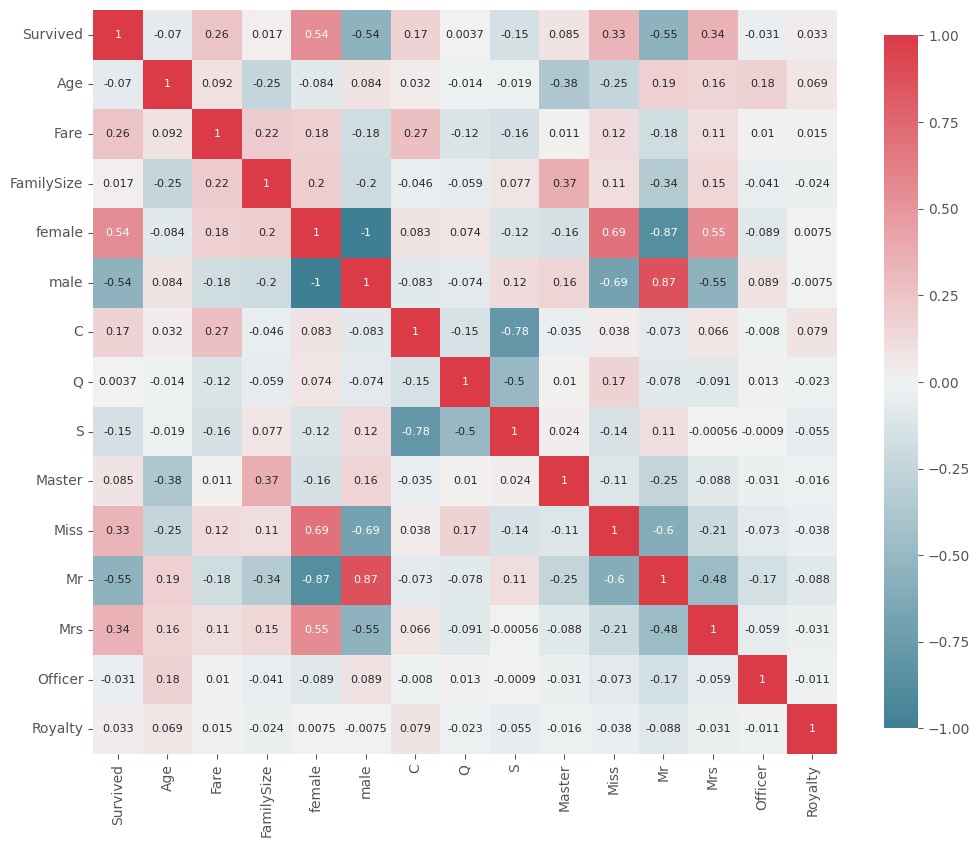

In [133]:
# 重新審視資料之間相關係數
corr = data_train[["Survived", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S", "Master", "Miss", "Mr", "Mrs", "Officer", "Royalty"]].corr()
corr

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
      corr,
      cmap = cmap,
      square=True,
      cbar_kws={ 'shrink' : .9 },
      ax = plt.subplots( figsize =( 12 , 10 ) )[1],
      annot = True,
      annot_kws = { 'fontsize' : 8 }
)

corr[["Survived"]]

RF_importance：
             importance
feature               
Q             0.006404
C             0.011078
S             0.014316
FamilySize    0.075410
Pclass        0.080464
male          0.138544
female        0.144438
Age           0.261270
Fare          0.268075

RF_score：
 0.8092883895131084


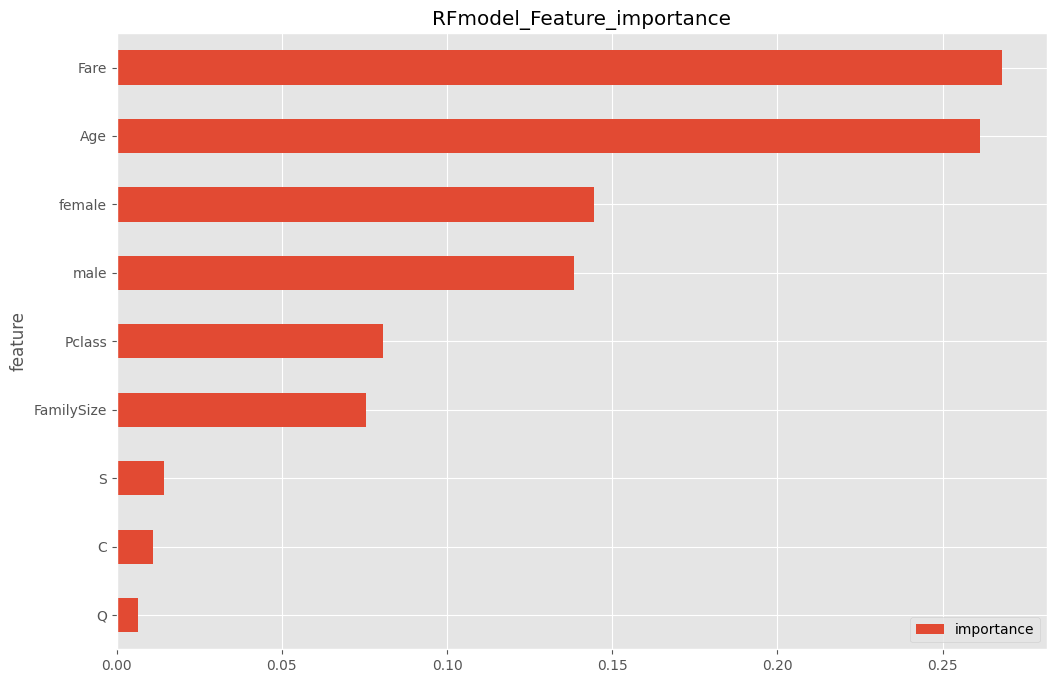

In [134]:
# 訓練模型 使用隨機森林樹
X = data_train[["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S"]]
y = data_train["Survived"]

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X, y)
RF_importance = RF.feature_importances_
feature_col = ["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S"]

RF_importance_df = pd.DataFrame({"feature":feature_col, "importance":RF_importance})
RF_importance_df.sort_values(by=["importance"], ascending=True, inplace=True)
RF_importance_df.set_index("feature", inplace=True)
print("RF_importance：\n",RF_importance_df)
RF_importance_df.plot(kind="barh", figsize=(12,8), title="RFmodel_Feature_importance")

RF_score = cross_val_score(RF, X, y, cv=10, scoring="accuracy").mean()
print("\nRF_score：\n",RF_score)

In [135]:
# 使用其他模型
# 邏輯回歸(logistic regression)
# 決策樹(decision tree)
# 梯度提升樹(Gradient Boosting Tree)
# 支持向量機(SVM)
# K近鄰(KNN)
models = {
    "RF":RandomForestClassifier(n_estimators=100, random_state=42),
    "GBC":GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LR":LogisticRegression(max_iter=100),
    "DTC":DecisionTreeClassifier(max_depth=4, random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=7),
    "SVC":SVC()
}

def ML_score(models, X, y, cv_num):
  total_score={}
  for model in models:
    score = cross_val_score(models[model], X, y, cv=cv_num).mean()
    total_score[model] = [score]
  return total_score
result_df = ML_score(models, X, y, 10)
result = pd.DataFrame(result_df, index=["score"])
print("first test：\n")
print(result)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

first test：

             RF       GBC        LR       DTC      KNN       SVC
score  0.809288  0.831685  0.798002  0.801448  0.72171  0.680225


將Name解析後的稱謂加進feature，觀察各模式之間差異。

RF_importance：
             importance
feature               
Royalty       0.000993
Officer       0.005196
Q             0.006798
C             0.010917
Master        0.011035
S             0.011744
Miss          0.020022
Mrs           0.027985
Pclass        0.075600
male          0.076192
FamilySize    0.082710
female        0.094800
Mr            0.099570
Age           0.226805
Fare          0.249631

RF_score：
 0.8070411985018726


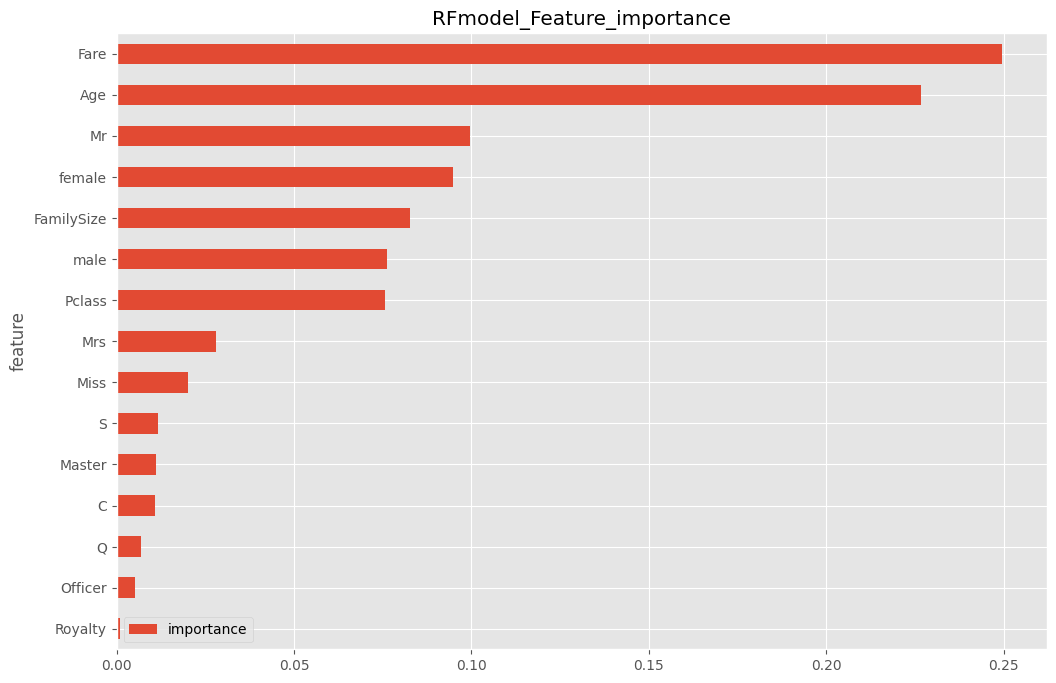

In [136]:
# 訓練模型 隨機森林樹木
# 加上Name資訊
X = data_train[["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S", "Master", "Miss", "Mr", "Mrs", "Officer", "Royalty"]]
y = data_train["Survived"]

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X, y)
RF_importance = RF.feature_importances_

feature_col = ["Pclass", "Age", "Fare", "FamilySize", "female", "male", "C", "Q", "S", "Master", "Miss", "Mr", "Mrs", "Officer", "Royalty"]
RF_importance_df = pd.DataFrame({"feature":feature_col, "importance":RF_importance})
RF_importance_df.sort_values(by=["importance"], ascending=True, inplace=True)
RF_importance_df.set_index("feature", inplace=True)
print("RF_importance：\n",RF_importance_df)

RF_importance_df.plot(kind="barh", figsize=(12,8), title="RFmodel_Feature_importance")

RF_score = cross_val_score(RF, X, y, cv=10, scoring="accuracy").mean()
print("\nRF_score：\n",RF_score)

In [137]:
# 使用其他模型
# 邏輯回歸(logistic regression)
# 決策樹(decision tree)
# 梯度提升樹(Gradient Boosting Tree)
# 支持向量機(SVM)
# K近鄰(KNN)
models = {
    "RF":RandomForestClassifier(n_estimators=100, random_state=42),
    "GBC":GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LR":LogisticRegression(max_iter=100),
    "DTC":DecisionTreeClassifier(max_depth=4, random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=7),
    "SVC":SVC()
}

def ML_score(models, X, y, cv_num):
  total_score={}
  for model in models:
    score = cross_val_score(models[model], X, y, cv=cv_num).mean()
    total_score[model] = [score]
  return total_score
result_df = ML_score(models, X, y, 10)
result = pd.DataFrame(result_df, index=["score"])
print("first test：\n")
print(result)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

first test：

             RF       GBC        LR       DTC       KNN       SVC
score  0.807041  0.836192  0.824919  0.835031  0.739663  0.684694
